In [1]:
# Import the numpy module to provide numerical functionality
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [2]:
hdulist = fits.open('dr16_eboss_simplefit_v1.fit')

In [3]:
head = hdulist[1].data
infheader = head.columns
infheader

ColDefs(
    name = 'PLATE'; format = 'I'
    name = 'MJD'; format = 'J'
    name = 'FIBERID'; format = 'I'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'BOSS_TARGET1'; format = 'J'
    name = 'BOSS_TARGET2'; format = 'J'
    name = 'TARGET_TYPE'; format = '16A'
    name = 'TARGET_TEXT'; format = '78A'
    name = 'EBV_SFD'; format = 'E'
    name = 'Z'; format = 'E'
    name = 'VDISP'; format = 'E'
    name = 'VDISP_ERR'; format = 'E'
    name = 'SN_MEDIAN'; format = 'E'
    name = 'DIST_MPC'; format = 'E'
    name = 'MSTAR_FIBER'; format = 'E'
    name = 'MSTAR_TOT'; format = 'E'
    name = 'TAUV'; format = 'D'
    name = 'TAUV_ERR'; format = 'D'
    name = 'LIGHT_FRAC'; format = '12D'
    name = 'LIGHT_FRAC_ERR'; format = '12D'
    name = 'CHISQ'; format = 'D'
    name = 'ECOEF'; format = '104E'
    name = 'V_OFF'; format = 'E'
    name = 'V_OFF_ERR'; format = 'E'
    name = 'SIGMA'; format = 'E'
    name = 'SIGMA_ERR'; format = 'E'
    name = 'BROAD_V_OFF';

In [4]:
OIII = hdulist[1].data['OIII_5007_FLUX']
NII = hdulist[1].data['NII_6584_FLUX']
BETA = hdulist[1].data['H_BETA_FLUX']
ALPHA = hdulist[1].data['H_ALPHA_FLUX']
ALPHAew = hdulist[1].data['H_ALPHA_EW']
OIIIerr = hdulist[1].data['OIII_5007_FLUX_ERR']
NIIerr = hdulist[1].data['NII_6584_FLUX_ERR']
NEV = hdulist[1].data['NeV_3426_FLUX']
NEVerr = hdulist[1].data['NeV_3426_FLUX_ERR']
NEVew = hdulist[1].data['NeV_3426_EW']
Z = hdulist[1].data['Z']

In [5]:
OIIIFIX = np.where((OIII > 3*OIIIerr) & (NII > 3*NIIerr))

In [6]:
ALPHANEW1 = ALPHA[OIIIFIX]
OIIINEW1 = OIII[OIIIFIX]
BETANEW1 = BETA[OIIIFIX]
NIINEW1 = NII[OIIIFIX]

In [7]:
OIIINEW = np.log10(OIIINEW1/BETANEW1)
NIINEW = np.log10(NIINEW1/ALPHANEW1)

C:\Users\Austin Warren\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


In [8]:
X = np.linspace(-1.8,.45)
XII = np.linspace(-1.8,-0.18)
Y = (0.61/(X - 0.47) + 1.3)
YII = (0.61/(XII - 0.05) + 1.19)

Text(0.5, 1.0, 'BPT Diagram')

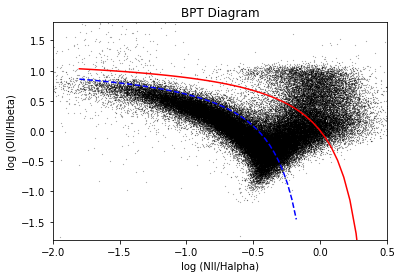

In [9]:
plt.figure()

plt.plot(NIINEW, OIIINEW,'.',color='black', markersize=.25)
plt.plot(X,Y,'-',color = 'red')
plt.plot(XII,YII,'--',color = 'blue')
plt.xlim([-2,.5])
plt.ylim([-1.8,1.8])

plt.xlabel('log (NII/Halpha)')
plt.ylabel('log (OIII/Hbeta)')
plt.title('BPT Diagram')

In [10]:
NEVFIX = np.where((NEV > 3*NEVerr) & (OIII > 3*OIIIerr) & (NII > 3*NIIerr) & (Z > .05) & (NEVew > 1) & (NEVerr != 0))

In [11]:
ALPHANEW2 = ALPHA[NEVFIX]
OIIINEW2 = OIII[NEVFIX]
BETANEW2 = BETA[NEVFIX]
NIINEW2 = NII[NEVFIX]
ALPHAew2 = ALPHAew[NEVFIX]
NEV2 = NEV[NEVFIX]
NEVew2 = NEVew[NEVFIX]
NEVerr2 = NEVerr[NEVFIX]
Z2 = Z[NEVFIX]
print(NEVew2)

[ 1.7197195  2.6447563  1.5821261 ...  2.236024   1.1621494 34.19676  ]


In [12]:
OIIIPLOT2 = np.log10(OIIINEW2/BETANEW2)
NIIPLOT2 = np.log10(NIINEW2/ALPHANEW2)

Text(0.5, 1.0, 'BPT Diagram')

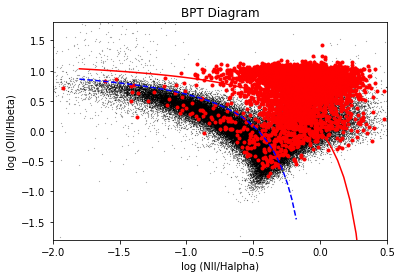

In [13]:
plt.figure()

plt.plot(NIINEW, OIIINEW,'.',color='black', markersize=.25)
plt.plot(NIIPLOT2,OIIIPLOT2,'.',color = 'red')
plt.plot(X,Y,'-',color = 'red')
plt.plot(XII,YII,'--',color = 'blue')
plt.xlim([-2,.5])
plt.ylim([-1.8,1.8])

plt.xlabel('log (NII/Halpha)')
plt.ylabel('log (OIII/Hbeta)')
plt.title('BPT Diagram')

In [14]:
OIIIFIXBLUE = np.where(((((0.61)/(NIINEW - 0.05)) + 1.19) > (OIIINEW)) & (NIINEW < .05))

C:\Users\Austin Warren\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater
  """Entry point for launching an IPython kernel.
C:\Users\Austin Warren\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.


In [15]:
OIIIFIXBLUE2 = np.where(((((0.61)/(NIIPLOT2 - 0.05)) + 1.19) > (OIIIPLOT2)) & (NIIPLOT2 < .05))

In [16]:
OIIINEWTEST = OIIINEW[OIIIFIXBLUE]
NIINEWTEST = NIINEW[OIIIFIXBLUE]

In [17]:
NII2NEW = NIIPLOT2[OIIIFIXBLUE2]
OIII2NEW = OIIIPLOT2[OIIIFIXBLUE2]

Text(0.5, 1.0, 'BPT Diagram')

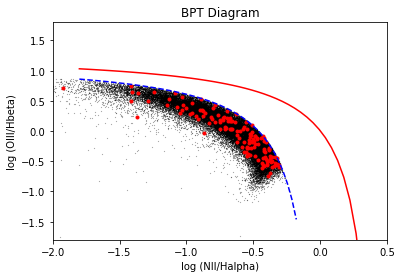

In [18]:
plt.figure()

plt.plot(NIINEWTEST, OIIINEWTEST,'.',color='black', markersize=.25)
plt.plot(NII2NEW,OIII2NEW,'.',color = 'red')
plt.plot(X,Y,'-',color = 'red')
plt.plot(XII,YII,'--',color = 'blue')
plt.xlim([-2,.5])
plt.ylim([-1.8,1.8])

plt.xlabel('log (NII/Halpha)')
plt.ylabel('log (OIII/Hbeta)')
plt.title('BPT Diagram')

In [19]:
NEVSN = NEV2/NEVerr2

In [20]:
print(NEVSN[OIIIFIXBLUE2],NEVew2[OIIIFIXBLUE2],ALPHAew2[OIIIFIXBLUE2],Z2[OIIIFIXBLUE2],NEVerr2[OIIIFIXBLUE2])

[3.4543252 3.062217  4.427869  3.621748  3.3608243 3.166143  3.116344
 3.2634506 3.9812872 4.3608665 3.0350416 3.1430333 3.0319095 3.0340195
 3.7465546 3.3337352 3.2764661 3.2220867 3.9790542 3.2433567 3.200074
 3.3933864 3.4586308 3.0724685 3.2048738 3.145438  3.0407162 3.4144423
 3.5169766 3.5210123 3.1485972 4.2377744 3.3321214 3.6643486 3.57278
 3.0555987 3.12213   3.596116  3.8039072 3.0929172 3.221665  3.5261452
 3.5797596 3.0970597 3.5937345 3.2526777 3.529171  3.8286421 3.3969023
 3.0196629 3.0874639 3.0373018 3.677277  3.3101726 3.427984  3.485983
 3.1260083 3.174657  3.085564  3.2547324 3.6422071 3.9122975 3.199779
 3.1257706 3.261861  3.210367  3.1974344 3.0181286 3.1566525 3.7609303
 3.1122353 3.0835416 3.0881536 3.008555  3.1555586 3.0579937 3.4158323
 3.5111854 3.1218572 3.072116  3.7480748 3.4441338 3.5101027 3.2005272
 3.04391   3.5079882 3.2233949 3.062506  3.1080081 3.1462114 3.6282399
 3.101597  3.0659962 3.1626744 3.1410067 3.071204  3.7458463 3.7168717
 3.1734068 3

In [21]:
plateh = hdulist[1].data['PLATE']
fiberh = hdulist[1].data['FIBERID']
mjdh = hdulist[1].data['MJD']

In [67]:
print(plateh)

[10000 10000 10000 ...  9632  9632  9632]


In [22]:
platem = plateh[NEVFIX]
fiberm = fiberh[NEVFIX]
mjdm = mjdh[NEVFIX]

In [23]:
platex = platem[OIIIFIXBLUE2]
fiberx = fiberm[OIIIFIXBLUE2]
mjdx = mjdm[OIIIFIXBLUE2]

In [24]:
fibern = [str(item).zfill(4) for item in fiberx]
with open('starformspecs.txt', 'w+') as text_file: # this loop creates a new file called and writes to it, line-by-line
    for p, f, m, in zip(platex, fibern, mjdx):
        line_write = 'https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/{}/spec-{}-{}-{}.fits'.format(p, p, m, f)
        text_file.write(line_write + '\n')

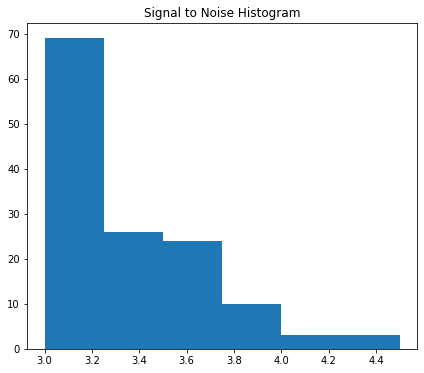

In [35]:
fig, ax = plt.subplots(figsize =(7, 6))
ax.hist(NEVSN[OIIIFIXBLUE2], bins = [3, 3.25, 3.50, 3.75, 4, 4.25, 4.5])
plt.title('Signal to Noise Histogram')

plt.show()

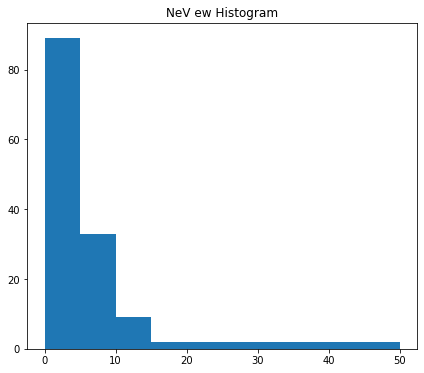

In [36]:
fig, ax = plt.subplots(figsize =(7, 6))
ax.hist(NEVew2[OIIIFIXBLUE2], bins = [0,5,10,15,20,50])
plt.title('NeV ew Histogram')

plt.show()

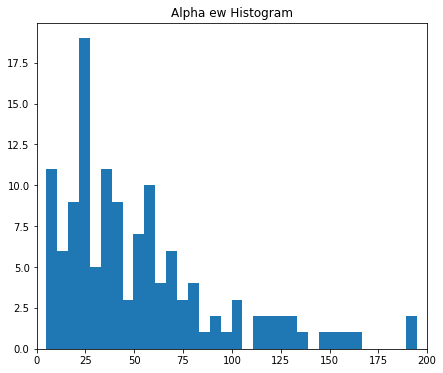

In [41]:
fig, ax = plt.subplots(figsize =(7, 6))
ax.hist(ALPHAew2[OIIIFIXBLUE2], bins = 160)
plt.title('Alpha ew Histogram')
plt.xlim([0,200])

plt.show()

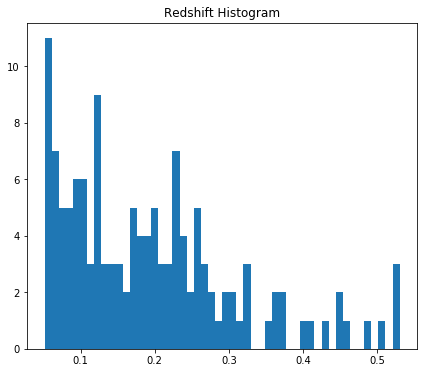

In [43]:
fig, ax = plt.subplots(figsize =(7, 6))
ax.hist(Z2[OIIIFIXBLUE2], bins = 50)
plt.title('Redshift Histogram')

plt.show()